In [2]:
# Generate 5-year daily sales dataset with seasonal pattern and noise and save to CSV
import pandas as pd, numpy as np

dates = pd.date_range(start="2016-01-01", end="2020-12-31", freq="D")
# seasonal yearly sine wave + noise
days = np.arange(len(dates))
# yearly period ~365
sales = 1500 + 600*np.sin(2*np.pi*days/365) + 300*np.random.randn(len(dates))
sales = np.maximum(sales, 50)  # ensure non-negative
df = pd.DataFrame({"date": dates.strftime("%Y-%m-%d"), "sales": sales.round(2)})
df.to_csv("sales_5yr.csv", index=False)
print(df.head(), "\nRows:", len(df), "sales_5yr.csv")


         date    sales
0  2016-01-01  1694.21
1  2016-01-02  1487.98
2  2016-01-03  1435.55
3  2016-01-04  2060.19
4  2016-01-05  1928.61 
Rows: 1827 sales_5yr.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
sales_data = pd.read_csv("sales.csv")
sales_data.head()

,date,sales
0,2016-01-01,1694.21
1,2016-01-02,1487.98
2,2016-01-03,1435.55
3,2016-01-04,2060.19
4,2016-01-05,1928.61


In [22]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1827 non-null   object 
 1   sales   1827 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


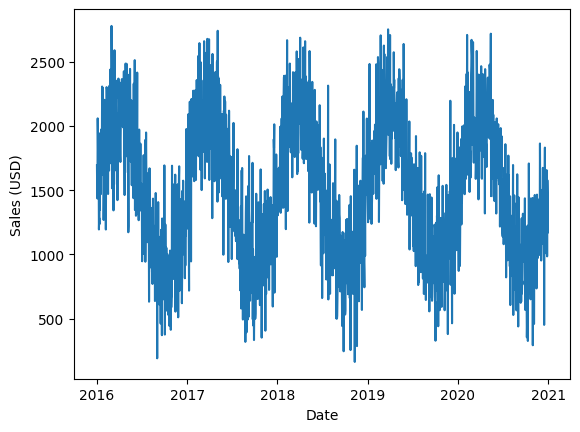

In [23]:
# convert string to datetime64
sales_data["date"] = pd.to_datetime(sales_data["date"])

# create line plot of sales data
plt.plot(sales_data["date"], sales_data["sales"])
plt.xlabel("Date")
plt.ylabel("Sales (USD)")
plt.show()

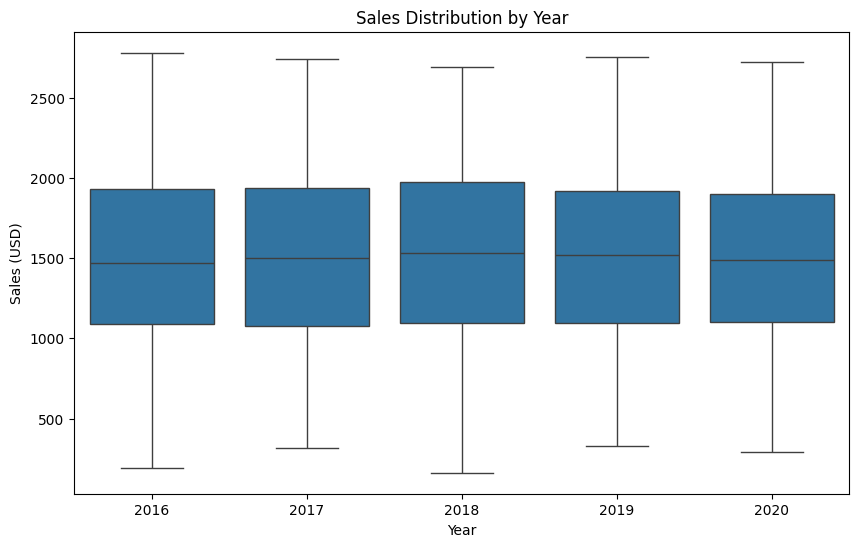

In [15]:
# Box plot of sales data
plt.figure(figsize=(10, 6))
sns.boxplot(x=sales_data.index.year, y="sales", data=sales_data)
plt.xlabel("Year")
plt.ylabel("Sales (USD)")
plt.title("Sales Distribution by Year")
plt.show()

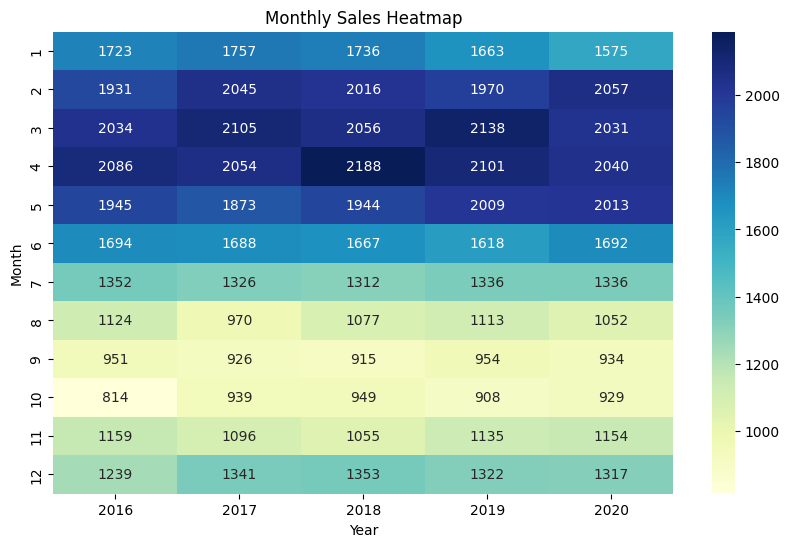

In [16]:
# Heatmap of sales data (monthly)
sales_data["year"] = sales_data.index.year
sales_data["month"] = sales_data.index.month
monthly_sales = sales_data.pivot_table(index="month", columns="year", values="sales")
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_sales, cmap="YlGnBu", annot=True, fmt=".0f")
plt.xlabel("Year")
plt.ylabel("Month")
plt.title("Monthly Sales Heatmap")
plt.show()

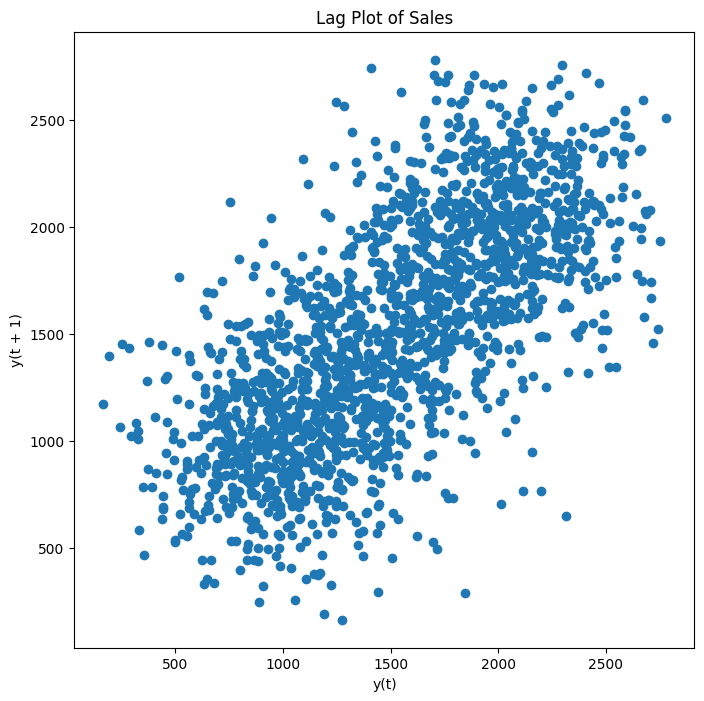

In [17]:
from pandas.plotting import lag_plot

# Lag plot of sales data
plt.figure(figsize=(8, 8))
lag_plot(sales_data["sales"])
plt.title("Lag Plot of Sales")
plt.show()

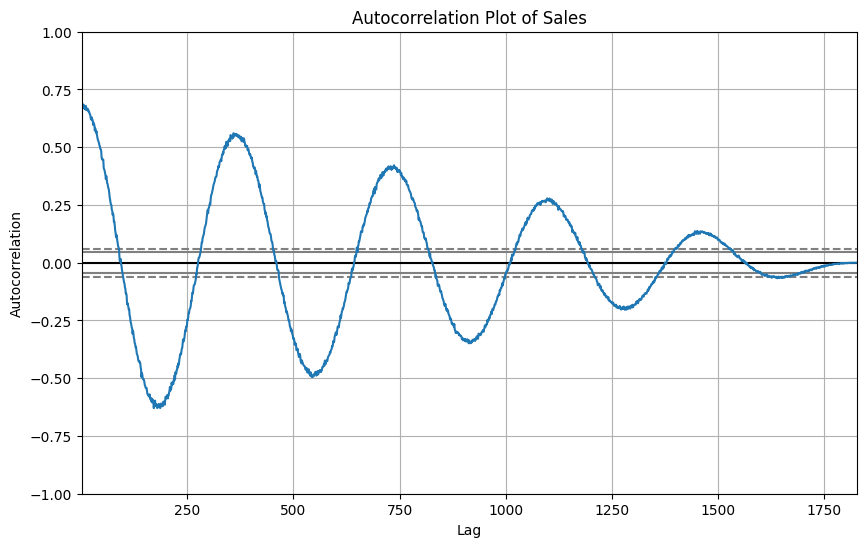

In [18]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation plot of sales data
plt.figure(figsize=(10, 6))
autocorrelation_plot(sales_data["sales"])
plt.title("Autocorrelation Plot of Sales")
plt.show()